# Affine Transformation

In [9]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 30, 15

def mouse_handler(event, x, y, flags, data) :
    
    if event == cv2.EVENT_LBUTTONDOWN :
        cv2.circle(data['im'], (x,y),3, (0,0,255), 5, 16);
        cv2.imshow("Image", data['im']);
        if len(data['points']) < 4 :
            data['points'].append([x,y])


def get_four_points(im):
    
    # Set up data to send to mouse handler
    data = {}
    data['im'] = im.copy()
    data['points'] = []
    
    #Set the callback function for any mouse event
    cv2.imshow("Image",im)
    cv2.setMouseCallback("Image", mouse_handler, data)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    # Convert array to np.array
    points = np.vstack(data['points']).astype(float)
    
    return points

def getAffineTransform(original_points, transformed_points):
    p = []
    for x,y in original_points:
        p.append((x,y,1))

    return np.linalg.solve(p, transformed_points).T

def to_mtx(img):
    H,V,C = img.shape
    mtr = np.zeros((V,H,C), dtype=np.int)
    for i in range(img.shape[0]):
        mtr[:,i] = img[i]
    
    return mtr

def to_img(mtr):
    V,H,C = mtr.shape
    img = np.zeros((H,V,C), dtype=np.int)
    for i in range(mtr.shape[0]):
        img[:,i] = mtr[i]
        
    return img

def warpAffine(img, M, dsize):
    mtr = to_mtx(img)
    R,C = dsize
    dst = np.zeros((R,C,mtr.shape[2]))
    for i in range(mtr.shape[0]):
        for j in range(mtr.shape[1]):
            i_dst,j_dst = np.dot(M, [i,j,1]).astype(int)
            if i_dst >= 0 and i_dst < R:
                if j_dst >= 0 and j_dst < C:
                    dst[i_dst,j_dst] = mtr[i,j]
            
    return to_img(dst)

In [4]:
src = cv2.imread("1.png")
dst = cv2.imread("H_output.png")
A = np.array([
    [8.7976964e-01,   3.1245438e-01,  -3.9430589e+01],
    [-1.8389418e-01,   9.3847198e-01,   1.5315784e+02]])

In [5]:
pts_src = get_four_points(src)
pts_dst = get_four_points(dst)

A_calc = getAffineTransform(pts_src, pts_dst)

print(A_calc)

[[  0.80008537   0.31075697 -34.03998293]
 [ -0.24247455   0.94820717 145.2626162 ]]


In [6]:
print(A-A_calc)

[[ 7.96842672e-02  1.69740789e-03 -5.39060607e+00]
 [ 5.85803663e-02 -9.73519131e-03  7.89522380e+00]]


In [7]:
destination_size = (src.shape[1],src.shape[0])
re_dst = warpAffine(src, A_calc, destination_size)

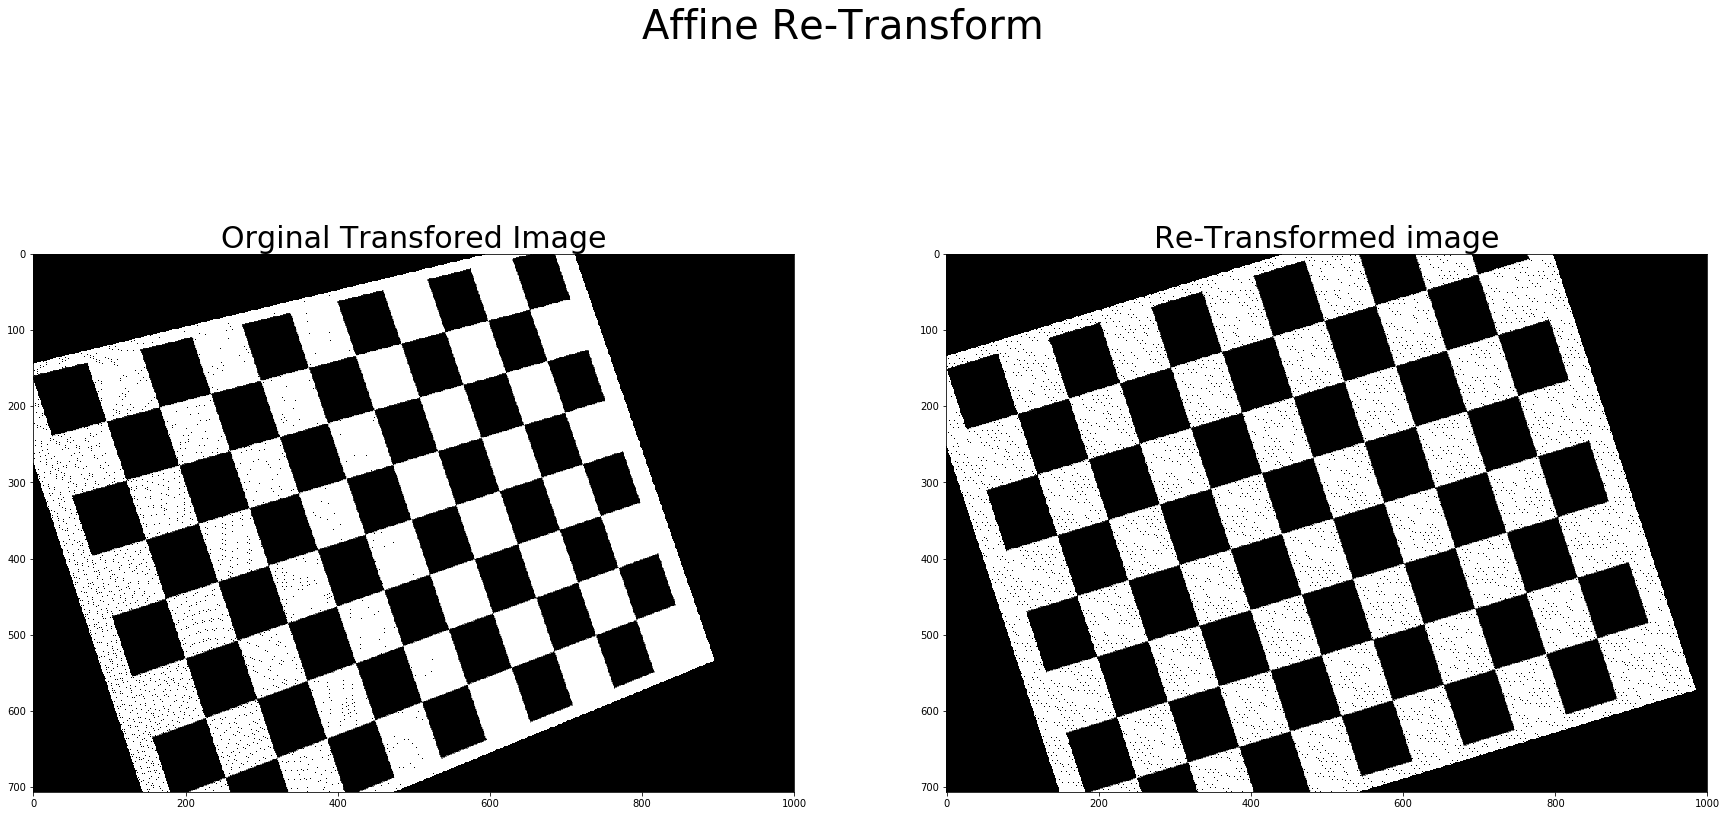

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Affine Re-Transform', fontsize=40)
ax1.set_title('Orginal Transfored Image', fontsize=30)
im1 = ax1.imshow(dst)
ax2.set_title('Re-Transformed image', fontsize=30)
im2 = ax2.imshow(re_dst)
plt.show()